In [20]:
from scipy.spatial.transform import Rotation as R
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from LightTransportSimulator.RayVectors.utils import nearest_intersected_object
from LightTransportSimulator.RayVectors.intersects import sphere_intersect
from LightTransportSimulator.RayVectors.vectors import *
from LightTransportSimulator.RayVectors.rays import *

In [22]:
camera = np.array([0, 0, 1])

In [23]:
width = 300
height = 200
aspect_ratio = width/height
screen = {'left': -1, 'top': 1 / aspect_ratio, 'right': 1, 'bottom': -1 / aspect_ratio}
max_depth = 3

In [24]:
light_source = { 'position': np.array([5, 5, 5]), 'ambient': np.array([1, 1, 1]), 'diffuse': np.array([1, 1, 1]), 'specular': np.array([1, 1, 1]) }

In [25]:
objects = [
    {'type': 'sphere', 'geom_props': { 'center': np.array([-0.2, 0, -1]), 'radius': 0.7 }, 'light_props': { 'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.7, 0, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'sphere', 'geom_props': { 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1 }, 'light_props': { 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'sphere', 'geom_props': { 'center': np.array([-0.3, 0, 0]), 'radius': 0.15 }, 'light_props': { 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'triangle', 'geom_props': { 'a': np.array([-0.5,-0.5,0.0]), 'b': np.array([0.3,-0.3,0.0]), 'c': np.array([0.0,0.5,0.0]) }, 'light_props': { 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'plane', 'geom_props': { 'a': np.array([-300,-300,0.0]), 'b': np.array([300,-300,0.0]), 'c': np.array([0.0,300,0.0]) }, 'light_props': { 'ambient': np.array([0.1, 0.1, 0.1]), 'diffuse': np.array([0.6, 0.6, 0.6]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }}
]

In [31]:
objects = [
    {'type': 'plane', 'geom_props': { 'point': np.array([-1.1, 0.0, 0.0]), 'normal': np.array([1.0, 0.0, 0.0]) }, 'light_props': { 'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.7, 0, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'plane', 'geom_props': { 'point': np.array([1.1, 0.0, 0.0]), 'normal': np.array([-1.0, 0.0, 0.0]) }, 'light_props': { 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'plane', 'geom_props': { 'point': np.array([0.0, 0.0, 0.0]), 'normal': np.array([0.0, 1.0, 0.0]) }, 'light_props': { 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'plane', 'geom_props': { 'point': np.array([0.0, 2.0, 0.0]), 'normal': np.array([0.0, -1.0, 0.0]) }, 'light_props': { 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'plane', 'geom_props': { 'point': np.array([0.0, 0.0, 0.0]), 'normal': np.array([0.0, 0.0, 1.0]) }, 'light_props': { 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }}
]

In [55]:
objects = [
    {'type': 'sphere', 'geom_props': { 'center': np.array([-0.2, 0, -1]), 'radius': 0.7 }, 'light_props': { 'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.7, 0, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'sphere', 'geom_props': { 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1 }, 'light_props': { 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'sphere', 'geom_props': { 'center': np.array([-0.3, 0, 0]), 'radius': 0.15 }, 'light_props': { 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'plane', 'geom_props': { 'point': np.array([-5.0, 0.0, -1.0]), 'normal': np.array([1.0, 0.0, 0.0]) }, 'light_props': { 'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.7, 0, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }},
    {'type': 'plane', 'geom_props': { 'point': np.array([0.0, 0.0, -2.0]), 'normal': np.array([0.0, 0.0, 1.0]) }, 'light_props': { 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }}
]

In [56]:
image = np.zeros((height, width, 3))

In [57]:
for i, y in enumerate(np.linspace(screen['top'], screen['bottom'], height)):
    for j, x in enumerate(np.linspace(screen['left'], screen['right'], width)):
        # screen is on origin
        pixel = np.array([x, y, 0])
        origin = camera
        end = pixel
        direction = normalize(end - origin)

        color = np.zeros((3))
        reflection = 1

        for k in range(max_depth):
            # check for intersections
            nearest_object, min_distance = nearest_intersected_object(objects, origin, end)
            if nearest_object is None:
                break

            intersection = origin + min_distance * direction

            if nearest_object['type'] == 'sphere':
                normal_to_surface = normalize(intersection - nearest_object['geom_props']['center'])
            elif nearest_object['type'] == 'triangle':
                ab = nearest_object['geom_props']['b'] - nearest_object['geom_props']['a']
                ac = nearest_object['geom_props']['c'] - nearest_object['geom_props']['a']
                normal_to_surface = np.cross(ab, ac)
            else:
                normal_to_surface = nearest_object['geom_props']['normal']

            shifted_point = intersection + 1e-5 * normal_to_surface

            intersection_to_light = normalize(light_source['position'] - shifted_point)

            _, min_distance = nearest_intersected_object(objects, shifted_point, light_source['position'])
            intersection_to_light_distance = np.linalg.norm(light_source['position'] - intersection)
            is_shadowed = min_distance < intersection_to_light_distance

            if is_shadowed:
                break

            illumination = np.zeros((3))

            # ambiant
            illumination += get_ambience(nearest_object['light_props']['ambient'], light_source['ambient'])

            # diffuse
            illumination += get_diffuse(nearest_object['light_props']['diffuse'], light_source['diffuse'], intersection_to_light, normal_to_surface)

            # specular
            intersection_to_camera = normalize(camera - intersection)
            viewing_direction = normalize(intersection_to_light + intersection_to_camera)
            illumination += get_specular(nearest_object['light_props']['specular'], light_source['specular'], viewing_direction, normal_to_surface, nearest_object['light_props']['shininess'])

            # reflection
            color += reflection * illumination
            reflection *= nearest_object['light_props']['reflection']

            origin = shifted_point
            direction = reflected_ray(direction, normal_to_surface)

        image[i, j] = np.clip(color, 0, 1)
    print("%d/%d" % (i + 1, height))


7.817359599705717
4.690415759823431
7.848509002792823
4.677606368888565
7.880167174387089
4.664848126643862
7.912345248680997
4.652141453906753
7.9450546709275915
4.6394867743945065
7.978307208190714
4.626884514716622
8.01211496054297
4.614335104366219
8.046490372733391
4.601838975710401
8.081446246347975
4.589396563979553
8.116995752487597
4.577008307255548
8.153152444989237
4.564674646458857
8.189930274217893
4.552396025334494
8.227343601458218
4.540172890436809
8.265407213936557
4.528005691113071
8.304136340505938
4.515894879485838
8.343546668028397
4.503840910434057
8.38365435849123
4.491844241572893
8.424476066895846
4.479905333232239
8.466028959960282
4.468024648433887
8.508330735679015
4.456202652867337
8.551399643786308
4.444439814864189
8.595254507172296
4.43273660537113
8.639914744304015
4.4210934979214525
8.68540039270698
4.4095109686050815
8.731732133566366
4.3979894960371055
8.778931317510716
4.386529561324752
8.827019991645109
4.375131648032793
8.876020927905167
4.3637962

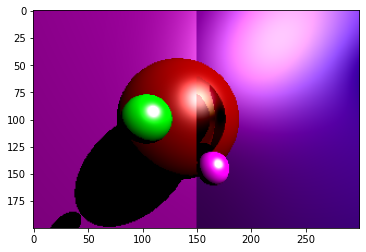

In [58]:
plt.imshow(image)